In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
NG = pd.read_csv('datasets/CME_NG1.csv', parse_dates=True, index_col='Date')
HO = pd.read_csv('datasets/CME_HO1.csv', parse_dates=True, index_col='Date')

In [3]:
print(NG.head())
print(HO.head())

             Close
Date              
2005-12-30  11.225
2005-12-29  11.223
2005-12-28  11.431
2005-12-27  11.022
2005-12-23  12.283
             Close
Date              
2005-12-30  1.7280
2005-12-29  1.7030
2005-12-28  1.6825
2005-12-27  1.6370
2005-12-23  1.7053


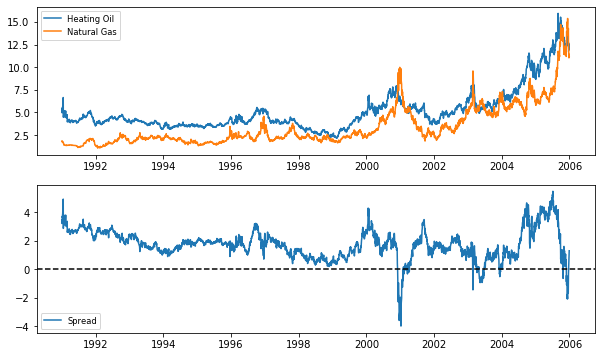

In [6]:
# Plot the prices separately
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [7]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [8]:
# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO - NG)
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.019831028071627968
The p-value for the ADF test on NG is  0.0045472849565425045
The p-value for the ADF test on the spread is  0.00011887051827353336


In [12]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(7.25 *HO)
result = sm.OLS(NG, 7.25 *HO).fit()

result.summary()
print(result.params)

Close    0.698739
dtype: float64


In [13]:

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC - b*7.25 *HO)
print("The p-value for the ADF test is ", adf_stats[1])

IndexError: index out of bounds

# NY temperature

In [14]:
temp_NY=pd.read_csv('datasets/NOAA_TAVG.csv', parse_dates=True, index_col='DATE')

In [15]:
temp_NY.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


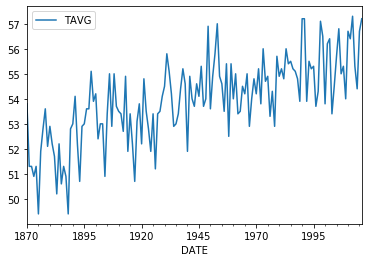

The p-value for the ADF test is  0.5832938987871128


In [16]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

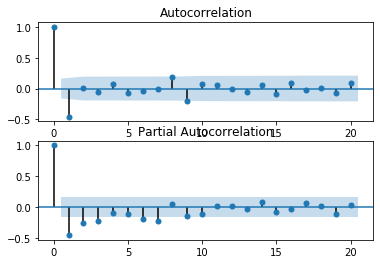

In [17]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [18]:

# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ",res_arma11.aic)

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.53468983139106
The AIC for an AR(2) is:  501.9274123160227
The AIC for an ARMA(1,1) is:  469.0729119489221


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


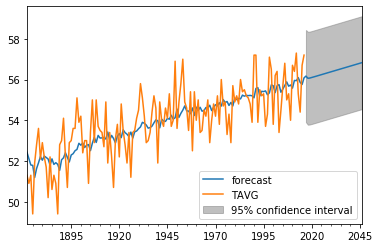

In [19]:

# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()